In [1]:
from __future__ import print_function

import numpy as np
import warnings

from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
cifar10 = unpickle('cifar-10-batches-py/data_batch_1')

In [4]:
d_decoded = {}
for k, v in cifar10.items():
    d_decoded[k.decode('utf8')] = v
d = d_decoded
data = d['data']
labels = d['labels']

data = data.reshape(data.shape[0], 3, 32, 32).transpose(0,2,3,1).astype('uint8')


In [12]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
input_shape = _obtain_input_shape(None,
                                  default_size=32,
                                  min_size=48,
                                  data_format=K.image_data_format(),
                                  require_flatten=True)


img_input = Input(shape=input_shape)

In [18]:
classes = len(np.unique(labels))
classes

10

In [19]:
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv4')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Classification block
x = Flatten(name='flatten')(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(classes, activation='softmax', name='predictions')(x)

In [20]:
inputs = img_input
# Create model.
model = Model(inputs, x, name='vgg19')

In [21]:
from keras.optimizers import SGD

sgd = SGD(lr=0.01, clipnorm=1.)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [22]:
X_train, x_test, y_train, y_test = train_test_split(data, labels)

In [23]:
model.fit(X_train, y_train)

Epoch 1/1
7500/7500 [==============================] - 1255s 167ms/step - loss: 2.2961 - acc: 0.1160


In [1]:
from tensorflow.python.client import device_lib

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 724863616887883396
]


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [4]:
import cntk

In [8]:
cntk.device.gpu(1)

ValueError: Specified GPU device id (1) is invalid.

[CALL STACK]
    > CNTK::Parameter::  SetValue
    - CNTK::DeviceDescriptor::  GPUDevice
    - PyInit__cntk_py
    - PyCFunction_FastCallDict
    - PyObject_CallFunctionObjArgs
    - PyEval_EvalFrameDefault
    - Py_CheckFunctionResult
    - PySet_Contains
    - PyEval_EvalFrameDefault
    - Py_CheckFunctionResult
    - PyObject_CallFunctionObjArgs
    - PyEval_EvalFrameDefault
    - Py_CheckFunctionResult
    - PyEval_GetGlobals (x2)
    - PyCFunction_FastCallDict



In [3]:
from keras.preprocessing.image import load_img

In [4]:
img = load_img('buzova.jpg')

In [6]:
import matplotlib.pyplot as plt

In [22]:
img.crop?

In [17]:
img.width, img.height

(480, 497)

In [234]:
import time
import scipy

In [27]:
arr = []
for x in range(0,480, 32):
    
    for y in range(0, 497, 32):
        tmp = img.crop(box=(x, y, x + 32, y + 32))
        arr.append(tmp)

In [49]:
type(arr[100])

PIL.Image.Image

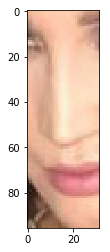

In [63]:
aa = np.append(arr[100], arr[101], axis=0)
aa = np.append(aa, arr[102], axis=0)
plt.imshow(aa)

In [37]:
import numpy as np

In [38]:
imx = np.array(arr[100])
imx.shape

(32, 32, 3)

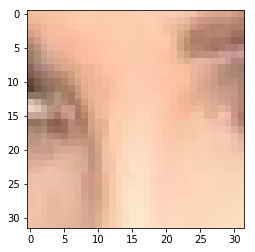

In [39]:
plt.imshow(imx)

In [10]:
img.tobytes().shape


AttributeError: 'bytes' object has no attribute 'shape'

In [51]:
from keras.models import load_model

In [202]:
loaded_model = load_model("handmadeds_e9.h5")

In [101]:
def border(img, height=2):
    h, w, c = img.shape

    im_bg = img
    #im_bg = (im_bg + 1) * 255  # e.g., make it white
    im_bg[:2,:,:] = np.zeros((2, w, c))
    im_bg[:,:2,:] = np.zeros((h, 2, c))
    im_bg[30:32,:,:] = np.zeros((2, w, c))
    im_bg[:,30:32,:] = np.zeros((h, 2, c))
    return img

In [207]:
# img = load_img(img_path)  # this is a PIL image

w, h = img.width, img.height
iii = []

# For each part of image do prediction and store result to arr
for x in range(0,w, 32):
    col = []
    for y in range(0, h, 32):
        tmp = np.array(img.crop(box=(x, y, x + 32, y + 32)))
        
        tt = tmp.reshape((1,) + tmp.shape)

        pred = loaded_model.predict(tt)  
        pr, cl = np.amax(pred), np.argmax(pred)
        # print(tmp.shape, col.shape)
        # print(pr)
        if cl == 1 and pr > .95:
            tmp = border(tmp, 2)
            # print(pr)
        if len(col) == 0:
            col = tmp
        else:
            col = np.append(col, tmp, axis=0)
    if len(iii) == 0:
        iii = col
    else:
        iii = np.append(iii, col, axis=1)

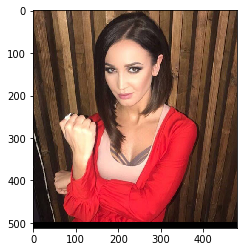

In [208]:
plt.imshow(iii)

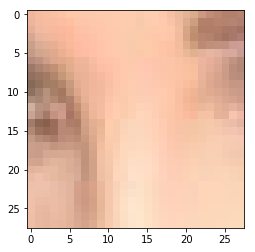

In [145]:
plt.imshow(imx[2:30,2:30,:])# .shape

In [193]:
imx[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

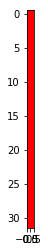

In [200]:
l = np.array([[[255,0,0]] for x in range(0,32)], dtype=np.uint8)
# ll = np.array([l for x in range(0, 32)], dtype=np.uint8)
plt.imshow(l)

In [201]:
l.shape, ll.shape

((32, 1, 3), (32, 32, 3))

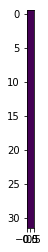

In [99]:
h, w, c = imx.shape

im_bg = imx
#im_bg = (im_bg + 1) * 255  # e.g., make it white
im_bg[:2,:,:] = np.zeros((2, w, c))
im_bg[:,:2,:] = np.zeros((h, 2, c))
im_bg[30:32,:,:] = np.zeros((2, w, c))
im_bg[:,30:32,:] = np.zeros((h, 2, c))

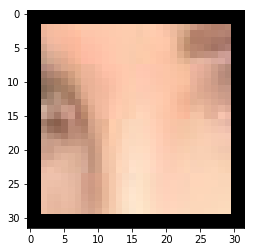

In [171]:
plt.imshow(im_bg)

In [113]:
import io

In [115]:
from PIL import Image


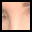

In [117]:
Image.fromarray(im_bg)

In [146]:
btrain = load_img('buzova.jpg')

In [231]:
np.random.randint(0, min(w,h),2)//32*32

array([ 64, 416], dtype=int32)

In [245]:
def set_random_gb(img, sm=32):
    w, h = img.width, img.height
    iii = []
    rx, ry = np.random.randint(0, min(w,h), 2)//32 * 32
    # For each part of image do prediction and store result to arr
    for x in range(0, w, 32):
        col = []
        for y in range(0, h, 32):
            xi = (x + sm) if (x + sm) <= w else w - x
            yi = (y + sm) if (y + sm) <= h else h - y
            tmp = np.array(img.crop(box=(x, y, x + sm, y + sm)))
            
            if x == rx and y == ry:
                tmp = scipy.ndimage.gaussian_filter(tmp, sigma=1)
                
            if len(col) == 0:
                col = tmp
            else:
                col = np.append(col, tmp, axis=0)
        if len(iii) == 0:
            iii = col
        else:
            iii = np.append(iii, col, axis=1)
    return iii, rx, ry

In [253]:
def pred_img(img, acc, hx, hy):
    w, h = img.width, img.height
    iii = []
    found = []
    # For each part of image do prediction and store result to arr
    for x in range(0,w, 32):
        col = []
        for y in range(0, h, 32):
            tmp = np.array(img.crop(box=(x, y, x + 32, y + 32)))

            tt = tmp.reshape((1,) + tmp.shape)

            pred = loaded_model.predict(tt)  
            pr, cl = np.amax(pred), np.argmax(pred)
            # print(tmp.shape, col.shape)
            # print(pr)
            if cl == 1 and pr > acc:
                tmp = border(tmp, 2)
                found.append([x,y])
                # print(pr)
            if x == hx and y == hy:
                print(pr, cl)
                
            if len(col) == 0:
                col = tmp
            else:
                col = np.append(col, tmp, axis=0)
        if len(iii) == 0:
            iii = col
        else:
            iii = np.append(iii, col, axis=1)
    return iii, found

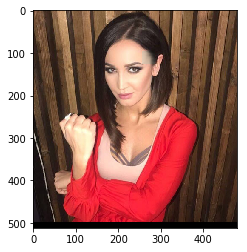

In [250]:
im, rx, ry = set_random_gb(btrain)
plt.imshow(im)

In [251]:
rx, ry

(256, 96)

In [255]:
pavel = load_img('imcorrdetect/public/app/resources/pavel.jpg')

0.9091391 1


([[0, 1120],
  [0, 1152],
  [0, 1216],
  [0, 1248],
  [32, 576],
  [32, 608],
  [32, 640],
  [32, 1120],
  [32, 1152],
  [96, 736],
  [96, 768],
  [96, 800],
  [128, 480],
  [128, 512],
  [128, 544],
  [128, 576],
  [128, 608],
  [160, 288],
  [160, 672],
  [160, 704],
  [160, 768],
  [192, 576],
  [192, 608],
  [224, 448],
  [224, 512],
  [256, 512],
  [256, 544],
  [256, 576],
  [288, 416],
  [288, 448],
  [288, 480],
  [320, 352],
  [320, 416],
  [320, 448],
  [320, 480],
  [352, 352],
  [352, 416],
  [352, 448],
  [384, 416],
  [448, 352],
  [480, 256],
  [480, 288],
  [480, 320],
  [480, 352],
  [512, 768],
  [544, 256],
  [544, 288],
  [544, 320],
  [544, 384],
  [544, 416],
  [544, 672],
  [544, 704],
  [544, 736],
  [544, 768],
  [544, 800],
  [576, 224],
  [576, 256],
  [576, 288],
  [576, 320],
  [576, 352],
  [576, 384],
  [576, 416],
  [576, 480],
  [576, 512],
  [576, 544],
  [576, 576],
  [576, 608],
  [576, 640],
  [576, 672],
  [576, 704],
  [576, 736],
  [576, 768],
  

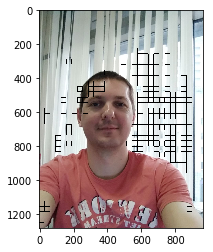

In [256]:
im, rx, ry = set_random_gb(pavel)
imi, fnd = pred_img(Image.fromarray(im), 0.9, rx, ry)
plt.imshow(imi)
fnd, [rx, ry]

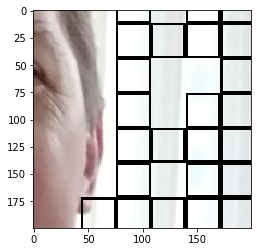

In [259]:
plt.imshow(Image.fromarray(imi).crop(box=(500,500,700,700)))